In [8]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from metrics import *


DATA_DIR = (os.getcwd() + "/data/")
PREDICTION_DIR = (os.getcwd() + "/predictions_new/")
start_date = '1999-01-01'
end_date = "2019-12-31"
# Get fundamental data for each stock in the ticker and append to the dataframe




def get_all_symbols():
    return [v.strip('.csv') for v in os.listdir(DATA_DIR)]

def get_current_predictions():
    return [v.strip('_predictions.csv') for v in os.listdir(PREDICTION_DIR)]


tickers = get_all_symbols()
predicted_tickers = get_current_predictions()



NameError: name 'DATA_DIR' is not defined

In [2]:
def make_to_monthly(ticker):
    df = pd.read_csv(DATA_DIR + ticker + '.csv', parse_dates=True, index_col='Date')
    #print(df.columns)
    agg_functions = {
        'Open': 'first',   # First value in the month for 'Open'
        'Close': 'last',   # Last value in the month for 'Close'
        'Adj Close': 'last',  # Last value in the month for 'Adj Close'
        'Volume': 'mean',   # Sum of 'Volume' in the month
        'Returns': 'prod',
        'High': 'max',     # Maximum value of 'High' in the month
        'Low': 'min',       # Minimum value of 'Low' in the month
        'Stock Momentum': 'mean',  # Mean of 'Stock Momentum' in the month
        'Short Term Reversal': 'mean',  # Mean of 'Short Term Reversal' in the month
        'Long Term Reversal': 'mean',  # Mean of 'Long Term Reversal' in the month
        'Total Returns': 'mean',  # Mean of 'Total Returns' in the month
        'Market_Beta': 'mean',
        'Turnover Volatility': 'mean',
        'Total Return Volatility': 'mean',
        'SMA_5': 'last',
        'SMA_20': 'last',
        'SMA_50': 'last',
        'SMA_252': 'last',
        'adv20': 'last',
        'VWAP': 'last',
        'log_returns': 'mean',
        'volatility_30': 'last',
        'volatility_60': 'last',
        'annual_volatility': 'last',
        'RSI(2)': 'last',
        'RSI(7)': 'last',
        'RSI(14)': 'last',
        'CCI(30)': 'last', 'CCI(50)': 'last', 'CCI(100)': 'last', 'BBWidth': 'last', 'Williams': 'last'
    }
    
    monthly = df.resample('M').agg(agg_functions)
    return monthly
    
    


#make_to_monthly('AAPL')


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Get the S&P 500 constituents
sp500_constituents_url = "https://en.wikipedia.org/wiki/List_of_S&P_500_companies"
sp500_constituents_df = pd.read_html(sp500_constituents_url)[0]

# symbols = sp500_constituents_df["Symbol"].tolist()

# Get the market cap for each constituent
market_caps = []
for symbol in sp500_constituents_df["Symbol"]:
    # Get the market cap from Yahoo Finance
    market_cap_url = f"https://finance.yahoo.com/quote/{symbol}?p={symbol}"
    market_cap_response = requests.get(market_cap_url)
    market_cap_data = market_cap_response.content.decode()

    # Find the market cap in the HTML response
    market_cap_start_index = market_cap_data.find("Market Cap:")
    market_cap_end_index = market_cap_data.find(
        "</span>", market_cap_start_index)
    market_cap = market_cap_data[market_cap_start_index +
                                 12:market_cap_end_index].strip()

    market_caps.append(market_cap)

# Add the market cap to the S&P 500 constituents DataFrame
sp500_constituents_df["Market Cap"] = market_caps

# Sort the DataFrame by market cap in descending order
sp500_constituents_df = sp500_constituents_df.sort_values(
    by=["Market Cap"], ascending=False)

# Get the top 100 stock tickers by market cap
top_100_sp500_tickers = sp500_constituents_df["Symbol"][:250]

# Print the top 100 stock tickers by market cap
print(top_100_sp500_tickers)


KeyboardInterrupt: 

In [4]:
# Util Functions

def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]


def RF_predict(train, val, final_model):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = final_model
    model.fit(X, y)
    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]


def walk_forward_validate(data, perc, final_model):
    predictions = []
    train, test = train_test_split(data, perc)
    history = [x for x in train]

    for i in range(len(test)):
        X_test, y_test = test[i, :-1], test[i, -1]
        pred = RF_predict(history, X_test, final_model)
        #print('Predicted=%f, Expected=%f' % (pred, y_test))	
        predictions.append(pred)

        history.append(test[i])

    return predictions, test[:, -1]


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'Short Term Reversal', 'Stock Momentum',
       'Long Term Reversal', 'Market_Beta', 'Turnover Volatility', 'Dividends',
       'Total Returns', 'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50',
       'SMA_252', 'adv20', 'VWAP', 'log_returns', 'volatility_30',
       'volatility_60', 'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)',
       'CCI(30)', 'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')

Ticker: LUV
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07614882309899601
Ticker: MAA
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.061614017065196154
Ticker: MAR
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06699173537710859
Ticker: MAS
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07016408327552116
Ticker: MCD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.046228302545760186
Ticker: MCHP
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07882563446861429
Ticker: MCK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07307125905272407
Ticker: MCO
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0769514265900191
Ticker: MDT
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.048309319196224755
Ticker: MGM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.09299604624277794
Ticker: MHK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Mean Absolute Error: 0.07126758863578986
Ticker: MKC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05280370469877565
Ticker: MLM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08768910294384051
Ticker: MMC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04334063590765001
Ticker: MMM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05266213440982901
Ticker: MNST
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.11755302723979925
Ticker: MO
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05958378766532088
Ticker: MRK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05307097228843748
Ticker: MRO
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.12734604873039662
Ticker: MS
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08082378838462738
Ticker: MSFT
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.053881352159252875
Ticker: MSI
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06426377397278447
Ticker: MTB
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.057048941024424184
Ticker: MTCH
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.09567169608336348
Ticker: MTD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.072572021463493
Ticker: MU
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.12801648248206915
Ticker: NDSN
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07533862381856828
Ticker: NEE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04437639309612614
Ticker: NEM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.11165570851146916
Ticker: NI
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.044226375730950784
Ticker: NKE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.060501155662687225
Ticker: NOC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06854248882963722
Ticker: NSC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07394419722769009
Ticker: NTAP
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.1408360642265275
Ticker: NTRS
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06308892175230345
Ticker: NUE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0692844003780797
Ticker: NVR
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06284093093523242
Ticker: O
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.053787081897553574
Ticker: ODFL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07651687363609581
Ticker: OKE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07212837589774157
Ticker: OMC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06244785965285423
Ticker: ORCL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06840412664350891
Ticker: ORLY
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0667183515989661
Ticker: OXY
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07358652353075729
Ticker: PAYX
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.052989389571903876
Ticker: PCAR
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0740037873051172
Ticker: PCG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.10589137050087143
Ticker: PEAK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.052334750927951736
Ticker: PEG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.052047193482915505
Ticker: PEP
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.039649014349209394
Ticker: PFE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04960431413265015
Ticker: PH
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07314305271866615
Ticker: PHM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07838138581789944
Ticker: PLD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.055926881609464116
Ticker: PNR
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07052008087805271
Ticker: PNW
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05838223125354743
Ticker: POOL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0739734087660407
Ticker: PPG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.060851220899112136
Ticker: PPL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04549466944895363
Ticker: PSA
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.053547516874888755
Ticker: PTC
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.09050551406523234
Ticker: PWR
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08783509596201326
Ticker: PXD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08893901273233316
Ticker: QCOM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08921854281672152
Ticker: RCL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.10299803647356401
Ticker: REG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.049269135489618913
Ticker: REGN
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.13637074109857272
Ticker: RF
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08839668722730767
Ticker: RHI
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07523906900166592
Ticker: RJF
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07168334570423499
Ticker: RL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.09662654137595217
Ticker: RMD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06767233723713001
Ticker: ROK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07628025046093198
Ticker: ROL
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05918709473541496
Ticker: ROP
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04502878826528065
Ticker: ROST
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.056818322841197394
Ticker: RSG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04519545006514029
Ticker: RTX
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.053444118493366104
Ticker: RVTY
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07995237025501527
Ticker: SBUX
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0697725609390648
Ticker: SEE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08814437457032685
Ticker: SLB
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07411309945011296
Ticker: SNA
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06032767050012652
Ticker: SNPS
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06999368116507515
Ticker: SPG
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.055333855100007504
Ticker: SPGI
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0660858151018442
Ticker: SRE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.03898363067846279
Ticker: STE
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06097342230287481
Ticker: STLD
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08958307036532896
Ticker: STT
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06992251383298595
Ticker: STZ
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07169968311572206
Ticker: SWK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06691130480600697
Ticker: SWKS
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.1391456692415539
Ticker: SYK
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05126368053057643
Ticker: SYY
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05063079744829535
Ticker: T
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0433062780068248
Ticker: TAP
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07235839126601158
Ticker: TECH
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07834962356012776
Ticker: TER
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.09599948854014258
Ticker: TFX
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06999539760730104
Ticker: TGT
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.06478570375303959
Ticker: TROW
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.05799434057337178
Ticker: TTWO
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.0936547551436297
Ticker: TXN
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.07344841505228465
Ticker: TXT
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.08045094593504759
Ticker: XOM
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'] = ticker_data['Close']
C:\Users\yinki\AppData\Local\Temp\ipykernel_18804\3224938779.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Mean Absolute Error: 0.04856840477577266
Ticker: XRAY
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       'Short Term Reversal', 'Stock Momentum', 'Long Term Reversal',
       'Market_Beta', 'Turnover Volatility', 'Dividends', 'Total Returns',
       'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
       'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
       'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
       'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams'],
      dtype='object')


KeyboardInterrupt: 

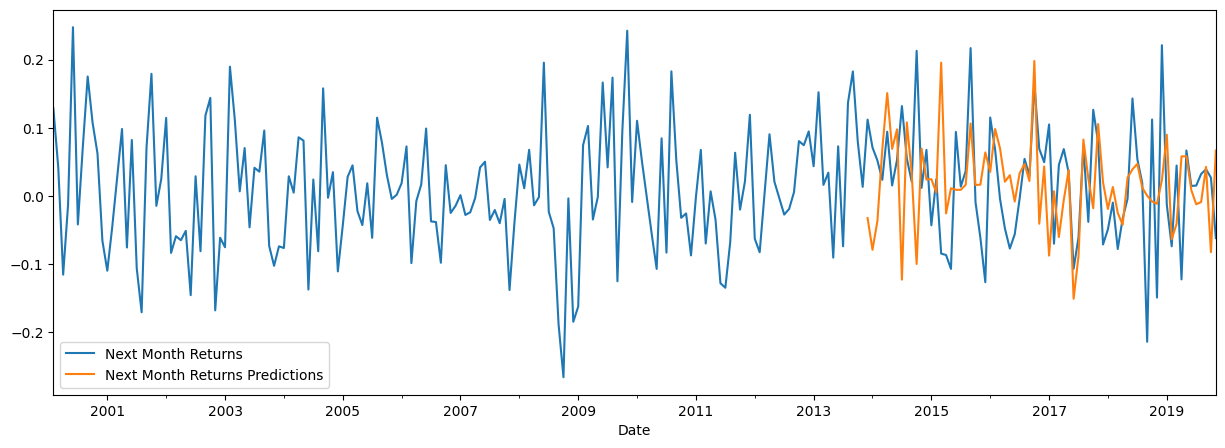

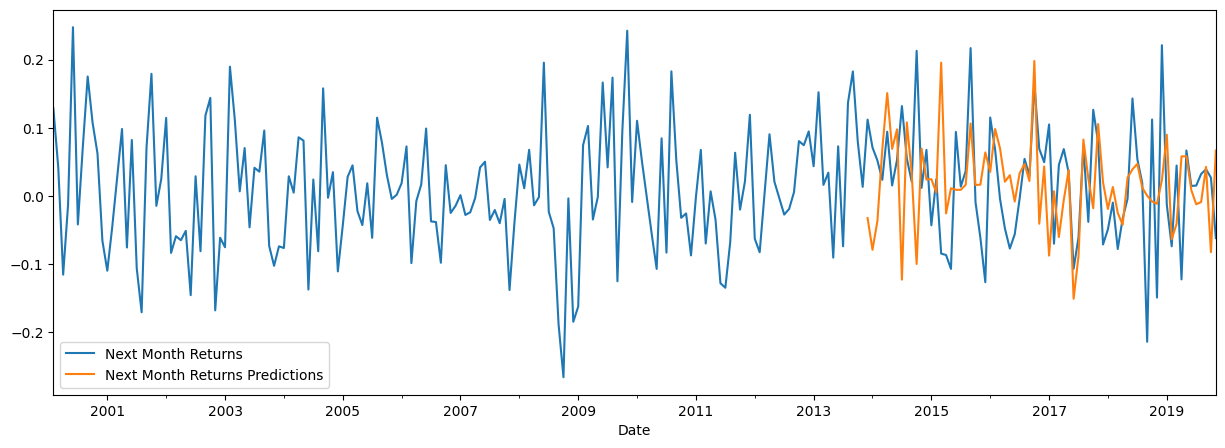

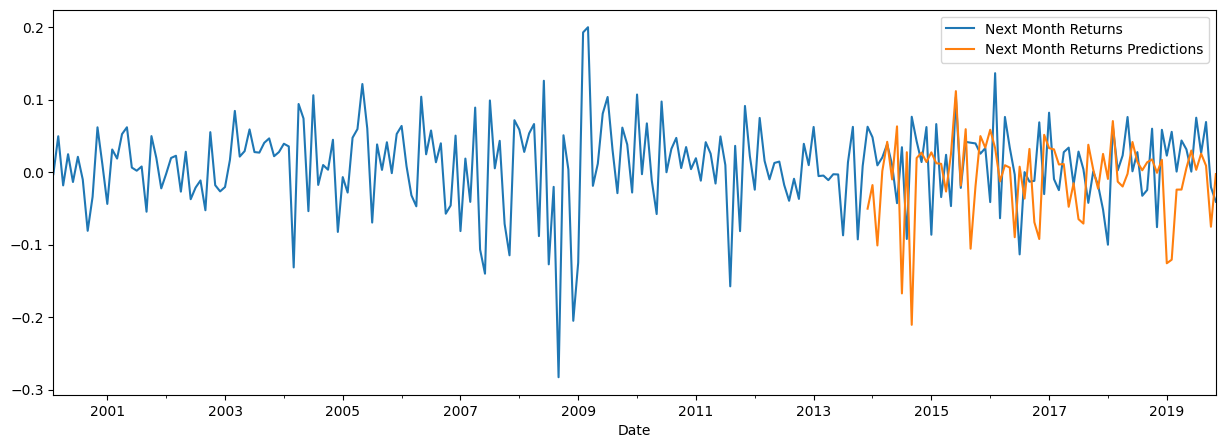

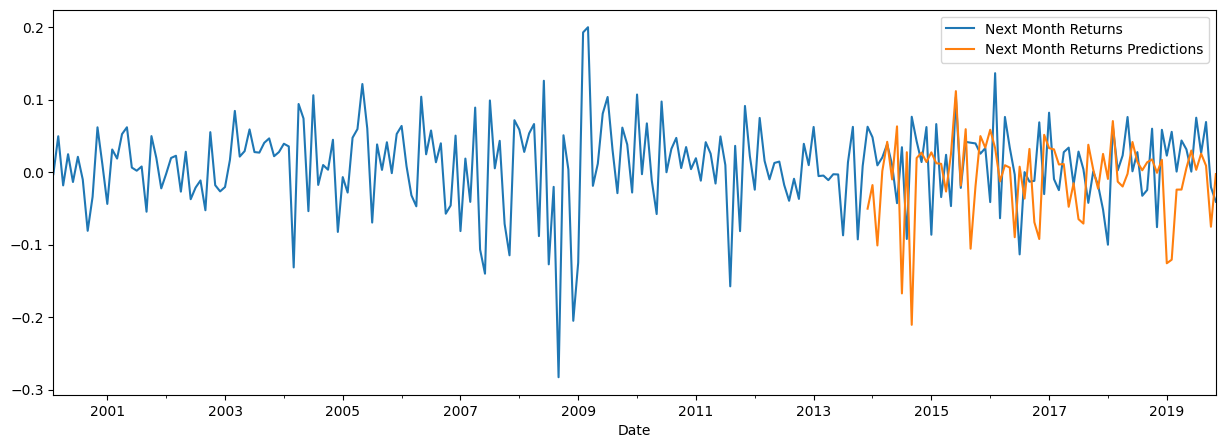

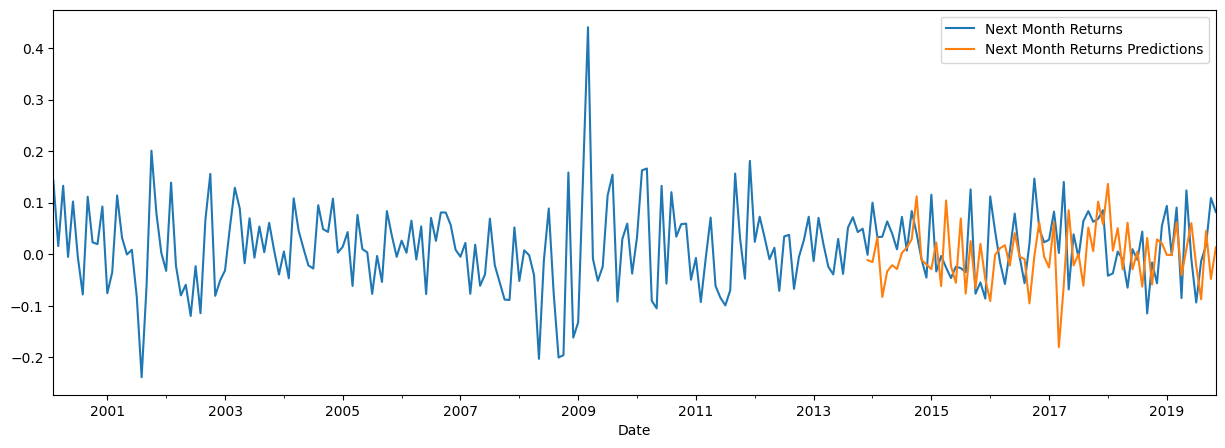

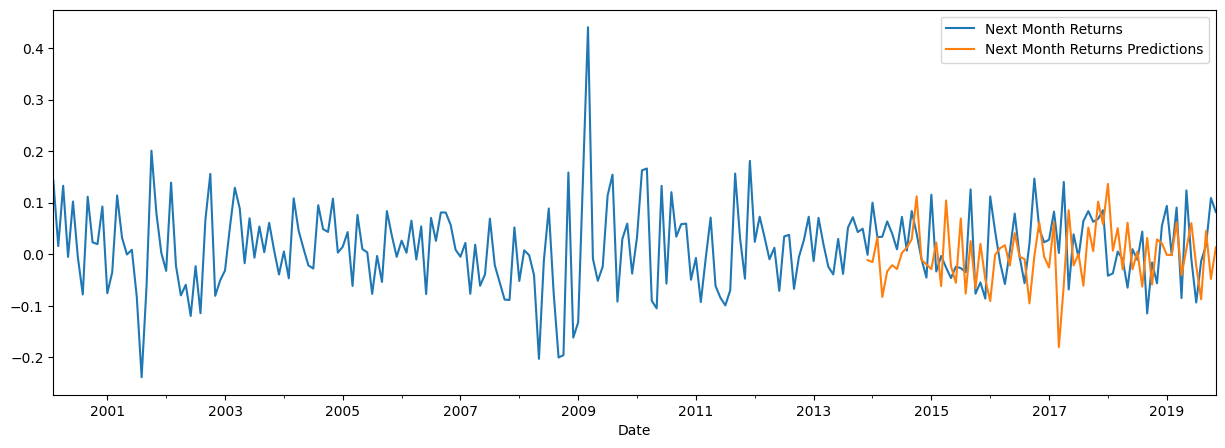

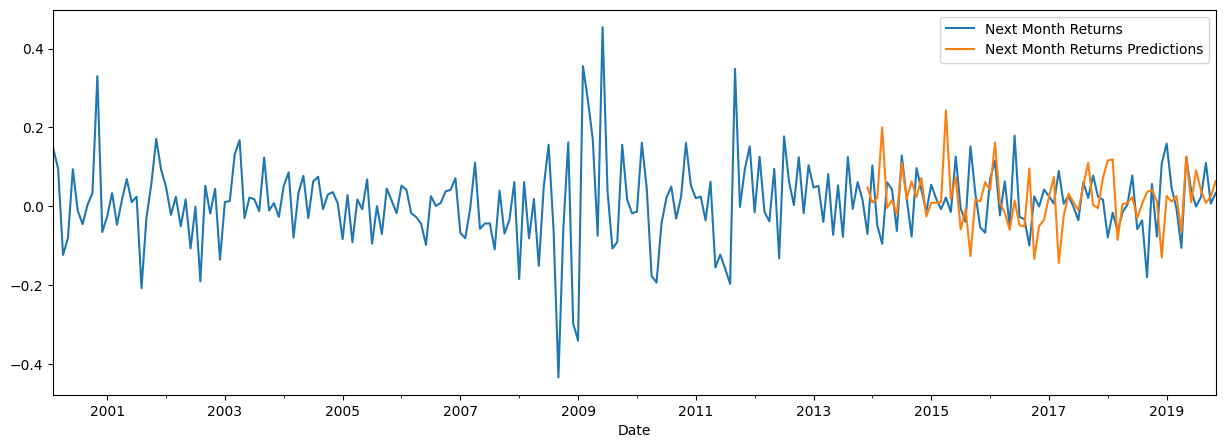

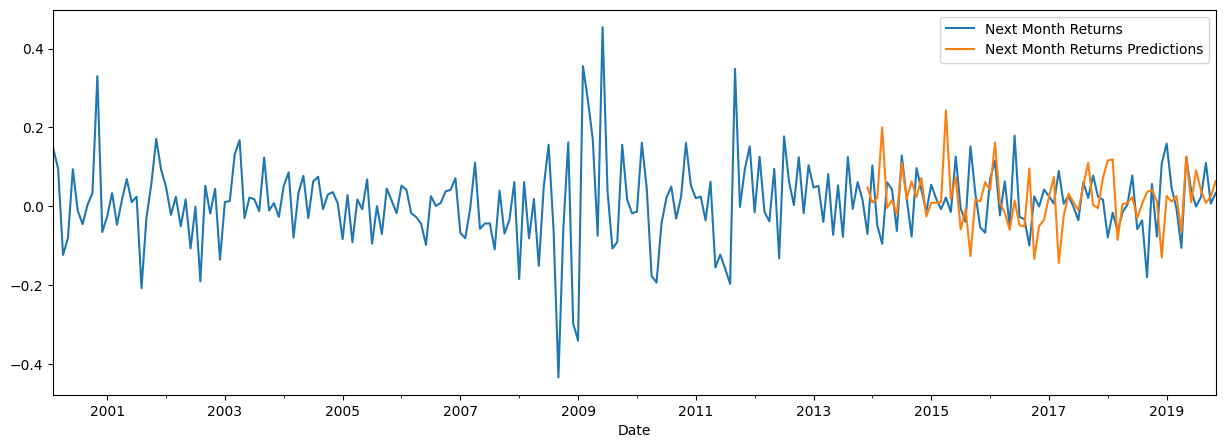

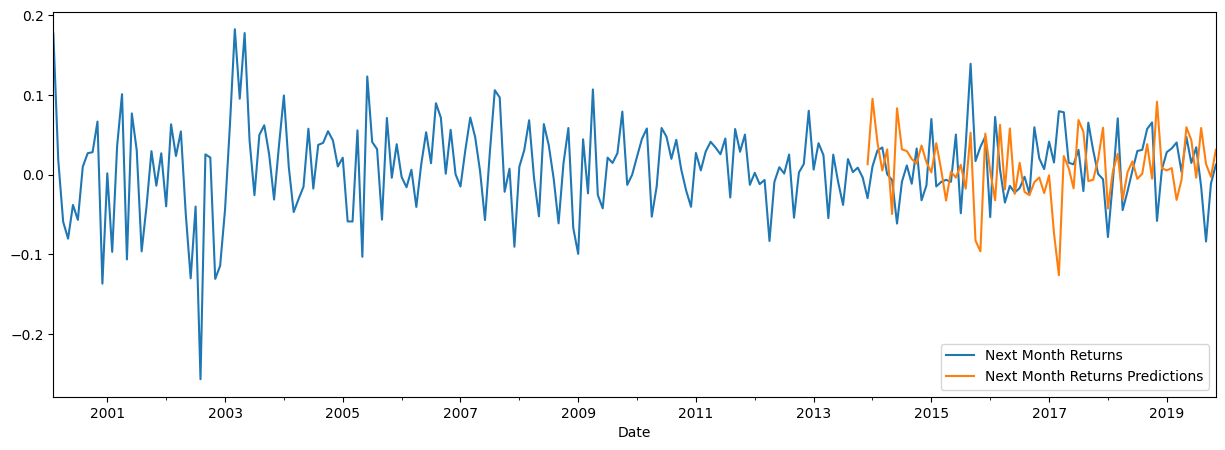

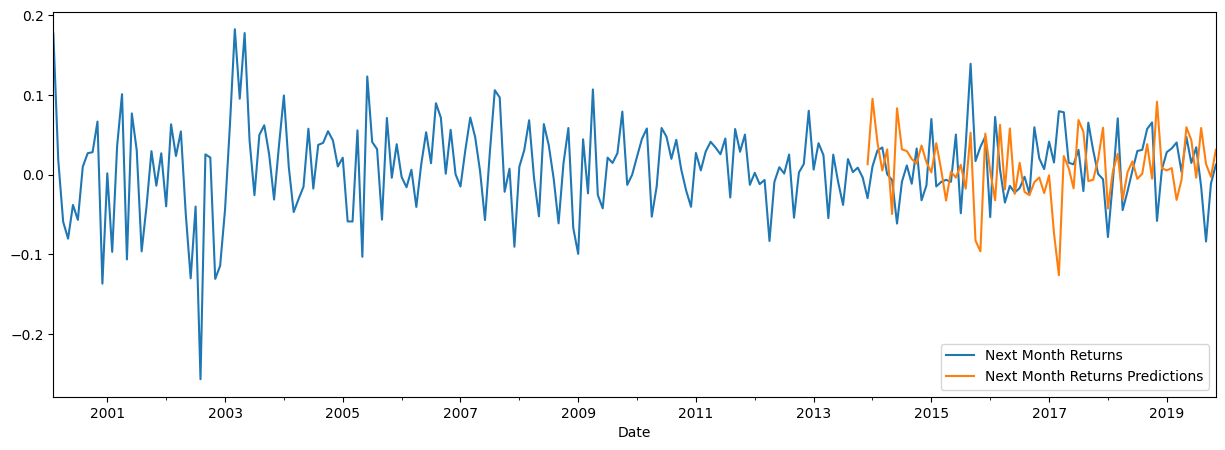

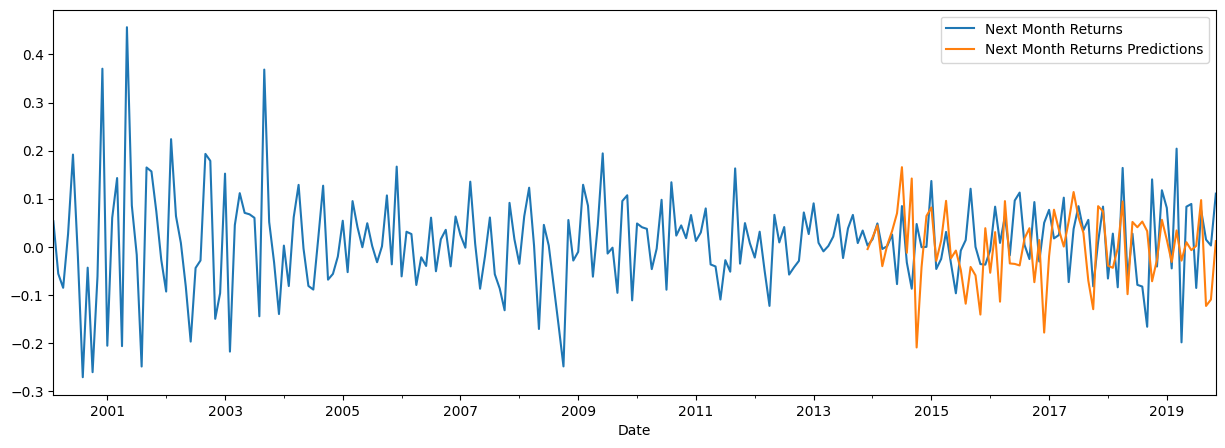

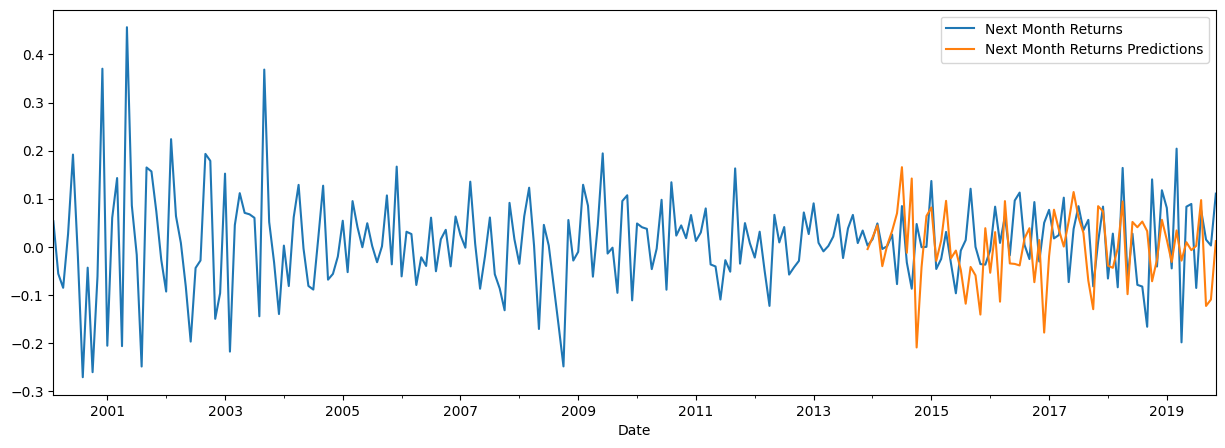

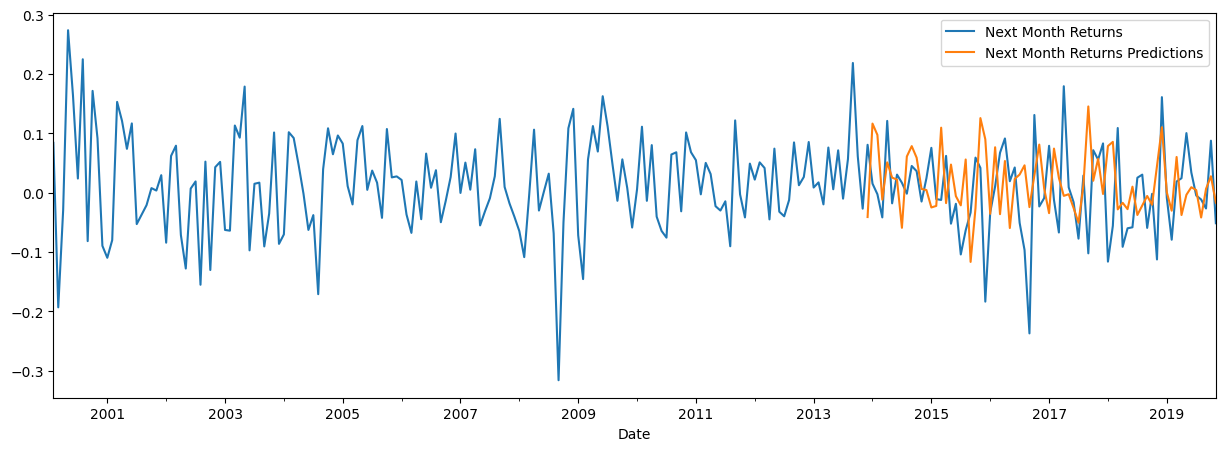

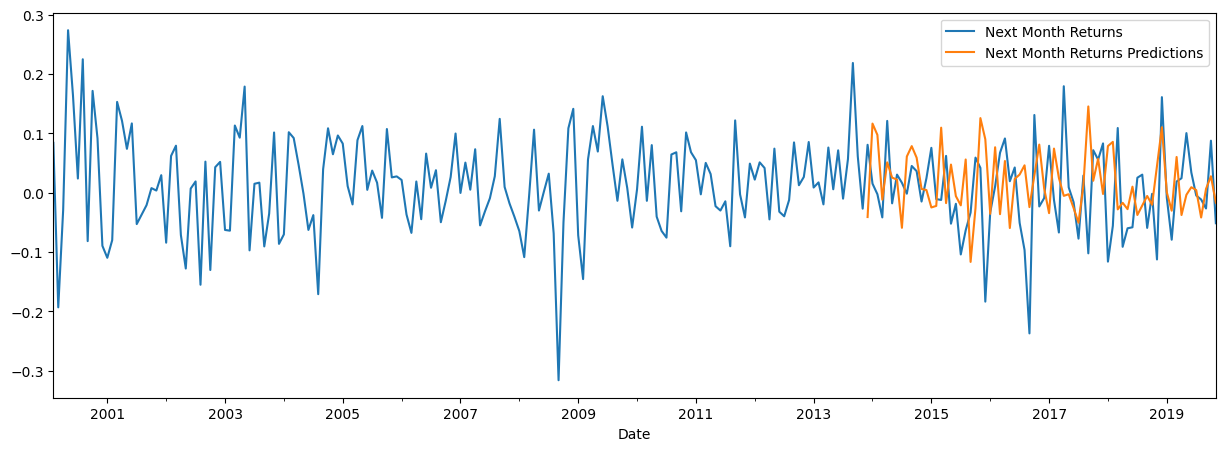

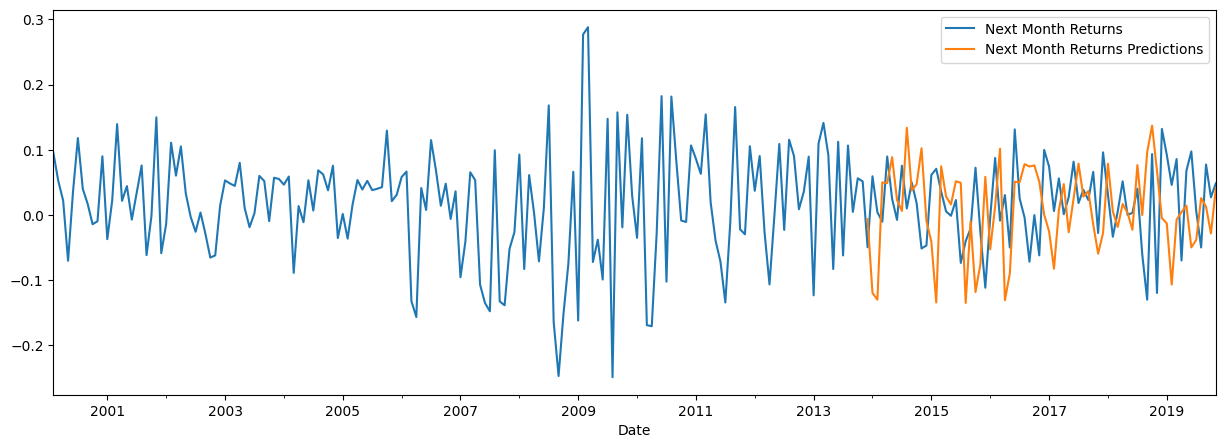

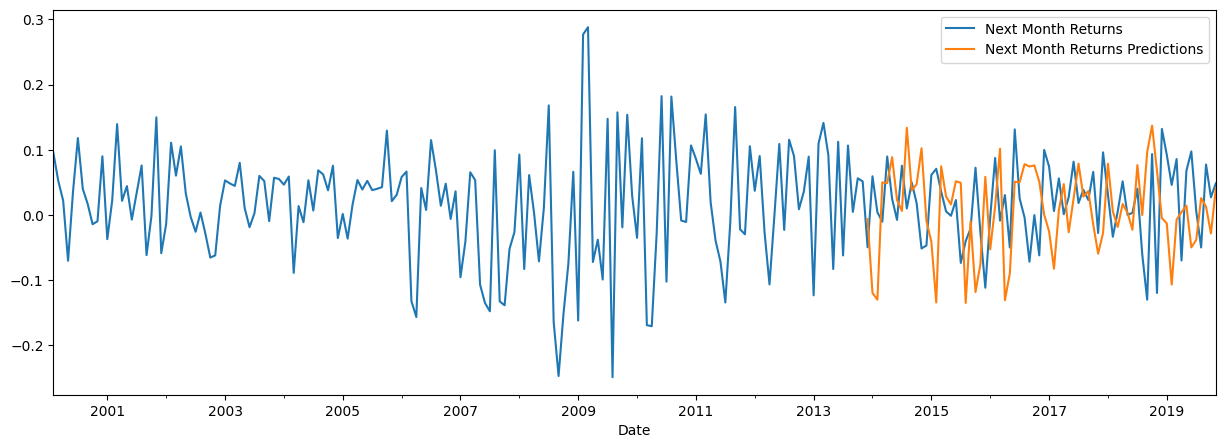

In [5]:
for ticker in tickers:
    if ticker in predicted_tickers or ticker == 'GSPC':
        continue
    print(f"Ticker: {ticker}")
    #ticker_data = pd.read_csv(
    #    f"data/{ticker}.csv", index_col='Date', parse_dates=True)
    ticker_data = make_to_monthly(ticker)
    ticker_data['Next Month Close'] = ticker_data['Close'].shift(-1)
    ticker_data.dropna(inplace=True)
    ticker_data['Next Month Returns'] = (ticker_data['Next Month Close'] - ticker_data['Close']) / \
        ticker_data['Close']
    #print(ticker_data.columns)
    # print(ticker_data.head())
    features = ticker_data[['Open', 'Close', 'Adj Close', 'Volume', 'Returns', 'High', 'Low',
                            'Stock Momentum', 'Short Term Reversal', 'Long Term Reversal',
                            'Total Returns', 'Market_Beta', 'Turnover Volatility',
                            'Total Return Volatility', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252',
                            'adv20', 'VWAP', 'log_returns', 'volatility_30', 'volatility_60',
                            'annual_volatility', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)',
                            'CCI(50)', 'CCI(100)', 'BBWidth', 'Williams']]

    target = ticker_data['Next Month Returns']

    train, test = train_test_split(ticker_data, 0.3)

    X_train = train[:, :-1]  # input as columns
    y_train = train[:, -1]  # output as rows

    '''
    # Building RF model
    random_forest = RandomForestRegressor(
        n_jobs=-1, random_state=123, oob_score=True, warm_start=True)
    
    param_grid = {
        'n_estimators': [ 600, 700, 800, 900, 1000],
        'max_depth': [10, 20,30, 40, 50, None],
        'min_samples_leaf': [1, 2, 4, 75, 100, 125],
        'criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
        'max_features': [None, 'sqrt', 'log2'],
    }
    
    grid_search = GridSearchCV(estimator=random_forest,
                              param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Best Params: {grid_search.best_params_}")
    rf_best_params = grid_search.best_params_
    '''
    rf = RandomForestRegressor(n_estimators=600, max_depth=20, max_features='log2', min_samples_leaf=4, criterion='squared_error',
                               random_state=123, oob_score=True, warm_start=True)
    
    # Build MLPRegressor
    mlp = MLPRegressor(max_iter=100000000000000, random_state=123, warm_start=True #)
                        ,activation='tanh', alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25), learning_rate='constant')
    '''
    param_grid = {
        'hidden_layer_sizes': [(50, 50), (100, 50, 25), (100, 100, 100), (200, 100, 50, 25), (200, 200, 200)],
        'activation': ['relu', 'tanh', 'identity'],
         'learning_rate': ['constant', 'adaptive'],
        'alpha': [0.0001, 0.001, 0.01],
    }
    
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Best Params: {grid_search.best_params_}")
    
    mlp_best_params = grid_search.best_params_
    
    base_models = [
        ('rf', RandomForestRegressor(**rf_best_params)),
        ('nn', MLPRegressor(**mlp_best_params))
    ]
    '''
    base_models = [
        ('rf', rf),
        ('nn', mlp)
    ]

    meta_learner = GradientBoostingRegressor(random_state=42, n_estimators=200,max_features='sqrt',learning_rate=0.1, max_depth=None)
    
    
    stack_model = StackingRegressor(
        estimators=base_models, final_estimator=meta_learner)
    '''
    # Grid Search for meta learner
    param_grid = {
        'final_estimator__n_estimators': [250, 225, 275, 200, 300, 175],
        'final_estimator__learning_rate': [0.01, 0.05, 0.1, 0.2],
        # Example parameter choices
        'final_estimator__max_depth': [6, 5, 8, None]
    }

    grid_search = GridSearchCV(estimator=stack_model, param_grid=param_grid,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    meta_learner = grid_search.best_estimator_
    '''
    
    final_stack_model = StackingRegressor(
        estimators=base_models, final_estimator=meta_learner)
    
    
    # Walk Forward Validation
    y_pred, y_actual = walk_forward_validate(ticker_data, 0.3, final_stack_model)
    

    # Add the predictions to the dataframe only for the test data, avoid look ahead bias
    ticker_data['Next Month Returns Predictions'] = np.nan
    ticker_data.iloc[-len(test):,ticker_data.columns.get_loc('Next Month Returns Predictions')] = y_pred
    ticker_data[['Next Month Returns', 'Next Month Returns Predictions']].plot(
        figsize=(15, 5))

    data = ticker_data[['Next Month Returns',
                        'Next Month Returns Predictions']]
    data.dropna(inplace=True)
    data.index = pd.to_datetime(data.index)
    # data.resample('M').prod().plot(figsize=(15, 5))


    #final_df = ticker_data['Returns Predictions'].resample('M').prod()
    final_df = ticker_data[['Next Month Returns',
                            'Next Month Returns Predictions']]
    
    final_df[['Next Month Returns', 'Next Month Returns Predictions']].plot(
        figsize=(15, 5))
    

    final_df['Close'] = ticker_data['Close']
    final_df.dropna(inplace=True)
    final_df.to_csv(f"predictions_new/{ticker}_predictions.csv")
    
    print(f"Mean Absolute Error: {mean_absolute_error(y_actual, y_pred)}")
